In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler,
                                   PolynomialFeatures)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('train.csv', sep =';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,7.2,0.2,0.19,7.7,0.045,53,176,0.9958,3.17,0.38,9.5,5,white
6710,6.7,0.3,0.34,7.5,0.036,39,124,0.9912,2.99,0.32,12.4,8,white
6711,6.6,0.3,0.24,3.3,0.034,29,99,0.9903,3.10,0.40,12.3,7,white
6712,8.0,0.2,0.31,5.6,0.049,24,97,0.9930,3.10,0.42,10.9,5,white


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 682.0+ KB


(array([  67., 1143., 3303., 1452.,  405.,  181.,   94.,   48.,   12.,
           9.]),
 array([ 3.8 ,  5.01,  6.22,  7.43,  8.64,  9.85, 11.06, 12.27, 13.48,
        14.69, 15.9 ]),
 <BarContainer object of 10 artists>)

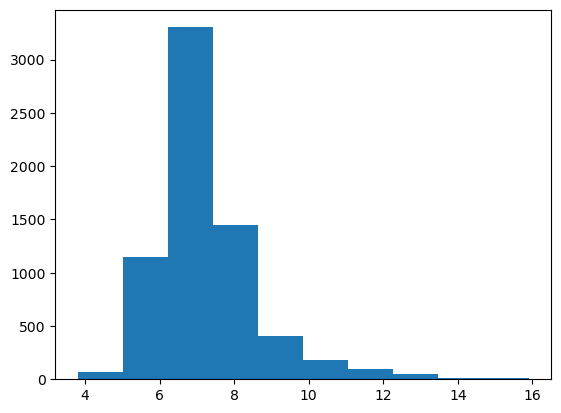

In [15]:
plt.hist(df['fixed acidity'])

(array([2108., 2196.,  972.,  502.,  503.,  348.,   41.,   30.,    7.,
           7.]),
 array([0.1 , 0.22, 0.34, 0.46, 0.58, 0.7 , 0.82, 0.94, 1.06, 1.18, 1.3 ]),
 <BarContainer object of 10 artists>)

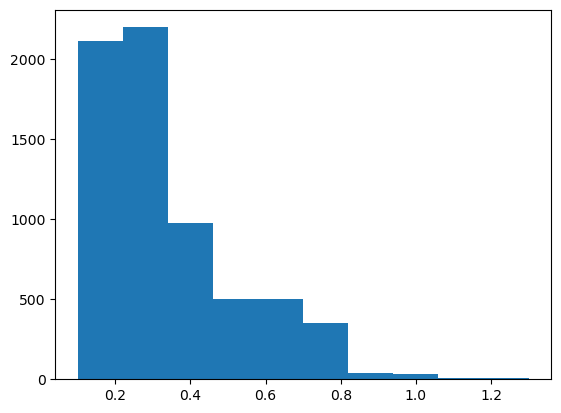

In [16]:
plt.hist(df['volatile acidity'])

(array([8.380e+02, 3.223e+03, 2.047e+03, 4.490e+02, 1.410e+02, 5.000e+00,
        9.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.   , 0.166, 0.332, 0.498, 0.664, 0.83 , 0.996, 1.162, 1.328,
        1.494, 1.66 ]),
 <BarContainer object of 10 artists>)

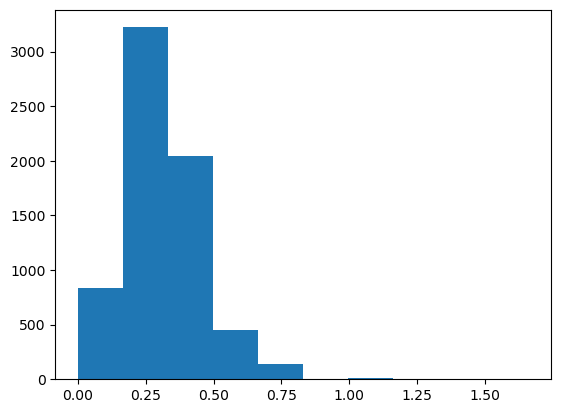

In [17]:
plt.hist(df['citric acid'])

(array([4.724e+03, 1.430e+03, 5.440e+02, 1.300e+01, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.6 ,  7.12, 13.64, 20.16, 26.68, 33.2 , 39.72, 46.24, 52.76,
        59.28, 65.8 ]),
 <BarContainer object of 10 artists>)

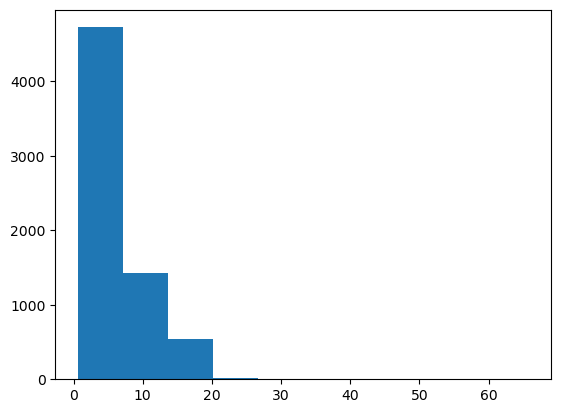

In [18]:
plt.hist(df['residual sugar'])

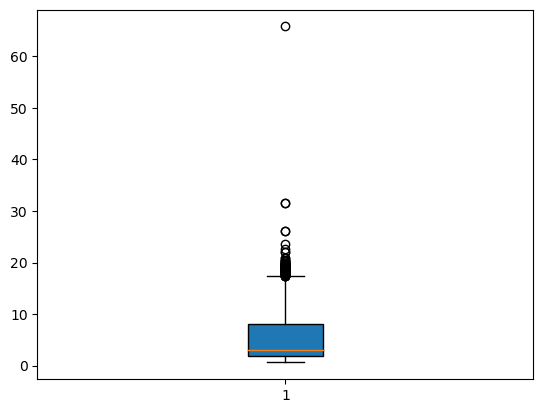

1.8     252
2.0     248
1.6     233
1.4     221
1.9     198
       ... 
18.7      1
18.6      1
18.5      1
17.7      1
65.8      1
Name: residual sugar, Length: 203, dtype: int64

In [62]:
plt.boxplot(df['residual sugar'], vert = True, patch_artist = True)
plt.show()
df['residual sugar'].value_counts()

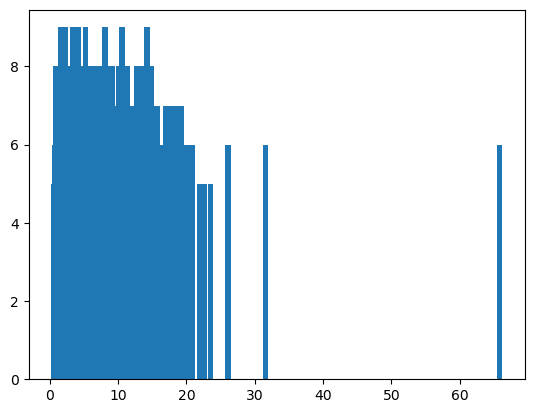

In [60]:
plt.bar('residual sugar','quality', data = df)
plt.show()

In [39]:
df= df.sort_values(by ='residual sugar', ascending = False)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2695,7.8,1.0,0.60,65.8,0.074,8,160,1.0390,3.39,0.69,11.7,6,white
2817,7.9,0.3,0.28,31.6,0.053,35,176,1.0103,3.15,0.38,8.8,6,white
5526,7.9,0.3,0.28,31.6,0.053,35,176,1.0103,3.15,0.38,8.8,6,white
3796,6.8,0.5,0.28,26.1,0.031,27,122,1.0030,3.06,0.42,10.6,6,white
3892,6.8,0.5,0.28,26.1,0.031,27,122,1.0030,3.06,0.42,10.6,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5084,8.5,0.2,0.34,0.7,0.040,5,25,0.9918,3.04,0.37,10.5,4,white
3275,5.2,0.2,0.27,0.7,0.030,11,68,0.9922,3.30,0.41,9.8,5,white
6535,5.3,0.2,0.29,0.7,0.028,11,66,0.9922,3.30,0.40,9.8,5,white
6208,8.7,0.2,0.35,0.6,0.042,11,71,0.9926,3.08,0.38,10.6,5,white
